In [1]:
import xarray as xr
import os
import numpy as np

# rough work

In [1]:
import xarray as xr

# Load the NetCDF file
file_path = "OR_forecast_albedo.nc"
ds = xr.open_dataset(file_path)

# Display metadata
print(ds)


<xarray.Dataset>
Dimensions:     (valid_time: 1096, latitude: 5, longitude: 5)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2018-01-01 2018-01-02 ... 2020-12-31
  * latitude    (latitude) float64 43.0 42.75 42.5 42.25 42.0
  * longitude   (longitude) float64 -124.0 -123.8 -123.5 -123.3 -123.0
    expver      (valid_time) object ...
Data variables:
    fal         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-18T04:48 GRIB to CDM+CF via cfgrib-0.9.1...


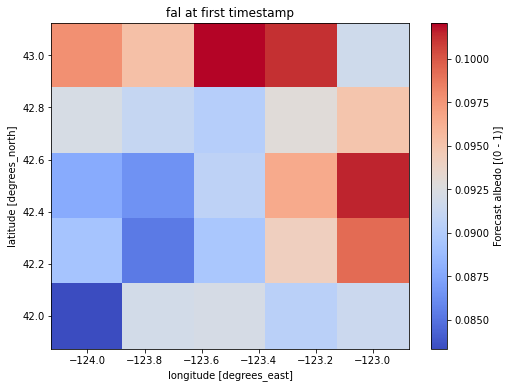

In [2]:
import matplotlib.pyplot as plt

# Select a time step (first timestamp)
fal_slice = ds["fal"].isel(valid_time=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
fal_slice.plot(cmap="coolwarm")
plt.title("fal at first timestamp")
plt.show()


In [6]:
ds

<xarray.Dataset>
Dimensions:     (valid_time: 1096, latitude: 5, longitude: 5)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2018-01-01 2018-01-02 ... 2020-12-31
  * latitude    (latitude) float64 43.0 42.75 42.5 42.25 42.0
  * longitude   (longitude) float64 -124.0 -123.8 -123.5 -123.3 -123.0
    expver      (valid_time) object ...
Data variables:
    fal         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-18T04:48 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
fal_np = ds["fal"].values  # Shape: (valid_time, latitude, longitude)
print(fal_np.shape)  # Example output: (1096, 5, 5)

(1096, 5, 5)


In [12]:
#OR_temperature_of_snow_layer.nc
import xarray as xr

# Load the NetCDF file
file_path = "OR_temperature_of_snow_layer.nc"
ds = xr.open_dataset(file_path)
value = list(ds.variables.keys())[-1]
fal_np = ds[value].values  # Shape: (valid_time, latitude, longitude)
print(fal_np.shape)  # Example output: (1096, 5, 5)

(1096, 5, 5)


In [11]:
value

'tsn'

In [ ]:
import numpy as np

# Save the matrix
np.save("fal_matrix.npy", fal_np)

# Load the matrix back
loaded_matrix = np.load("fal_matrix.npy")
print(loaded_matrix.shape)  # Should match original shape


# final code

In [2]:
folder_path = "/Users/kumarlab/Downloads/9ed27ffc7aaf284f5fb575c68e3a73a9 (1)/AAAI_hackathon" # Replace with your folder path
files = [f for f in os.listdir(folder_path) if f.startswith("OR_")]
for file_path in files:
    # Load the NetCDF file
    ds = xr.open_dataset(file_path)
    value = list(ds.variables.keys())[-1]
    matrix = ds[value].values  # Shape: (valid_time, latitude, longitude)
    
    # Save the matrix
    np.save(f"{value}_matrix.npy", matrix)
    print(file_path, " : ",matrix.shape)  # Example output: (1096, 5, 5)
    del ds, matrix

OR_soil_temperature_level_4.nc  :  (1096, 5, 5)
OR_10m_u_component_of_wind.nc  :  (1096, 5, 5)
OR_snow_albedo.nc  :  (1096, 5, 5)
OR_volumetric_soil_water_layer_2.nc  :  (1096, 5, 5)
OR_lake_mix_layer_temperature.nc  :  (1096, 5, 5)
OR_lake_bottom_temperature.nc  :  (1096, 5, 5)
OR_lake_total_layer_temperature.nc  :  (1096, 5, 5)
OR_volumetric_soil_water_layer_3.nc  :  (1096, 5, 5)
OR_snow_depth.nc  :  (1096, 5, 5)
OR_soil_temperature_level_1.nc  :  (1096, 5, 5)
OR_skin_reservoir_content.nc  :  (1096, 5, 5)
OR_forecast_albedo.nc  :  (1096, 5, 5)
OR_2m_dewpoint_temperature.nc  :  (1096, 5, 5)
OR_surface_pressure.nc  :  (1096, 5, 5)
OR_lake_ice_depth.nc  :  (1096, 5, 5)
OR_lake_ice_temperature.nc  :  (1096, 5, 5)
OR_skin_temperature.nc  :  (1096, 5, 5)
OR_lake_shape_factor.nc  :  (1096, 5, 5)
OR_leaf_area_index_low_vegetation.nc  :  (1096, 5, 5)
OR_temperature_of_snow_layer.nc  :  (1096, 5, 5)
OR_2m_temperature.nc  :  (1096, 5, 5)
OR_volumetric_soil_water_layer_4.nc  :  (1096, 5, 5)
OR_s